# CMF Coursework - Dec 2021

## AIM: Report on a Financial Derivative

### Step 1: Data Collection

#### Step 1-a: Install the library - yfinance

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


#### Step 1-b: Import Libraries

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import scipy.stats as si

#### Step 1-c: Pull data for Fiserv Inc - FISV:NASDAQ

In [3]:
data_fisv = yf.download("FISV ^VIX", start="2020-10-02", end="2021-11-02")

[*********************100%***********************]  2 of 2 completed


#### Step 1-d: Reviewing the data

In [4]:
data_fisv.head(14)

Adj Close                  Close                   High  \
                  FISV       ^VIX        FISV       ^VIX        FISV   
Date                                                                   
2020-10-01  104.250000  26.700001  104.250000  26.700001  105.800003   
2020-10-02  101.650002  27.629999  101.650002  27.629999  102.949997   
2020-10-05  100.820000  27.959999  100.820000  27.959999  102.989998   
2020-10-06  102.360001  29.480000  102.360001  29.480000  104.739998   
2020-10-07  102.419998  28.059999  102.419998  28.059999  103.629997   
2020-10-08  103.389999  26.360001  103.389999  26.360001  104.199997   
2020-10-09  105.110001  25.000000  105.110001  25.000000  105.269997   
2020-10-12  106.680000  25.070000  106.680000  25.070000  107.199997   
2020-10-13  104.760002  26.070000  104.760002  26.070000  107.080002   
2020-10-14  102.709999  26.400000  102.709999  26.400000  105.330002   
2020-10-15  101.809998  26.969999  101.809998  26.969999  102.059998   
2020-10-16  101.220001  27.410000  101.220001  27.410000  103.529999   
2020-10-19   98.739998  29.180000   98.739998  29.180000  101.519997   
2020-10-20   99.529999  29.350000   99.529999  29.350000  100.230003   

                              Low                   Open              Volume  \
                 ^VIX        FISV       ^VIX        FISV       ^VIX     FISV   
Date                                                                           
2020-10-01  27.110001  103.379997  25.330000  104.290001  25.780001  2943600   
2020-10-02  29.900000  100.900002  26.930000  101.900002  28.870001  3257200   
2020-10-05  29.690001  100.059998  27.270000  102.800003  29.520000  4268000   
2020-10-06  30.000000  101.860001  26.010000  102.660004  28.049999  4581500   
2020-10-07  29.760000  101.779999  27.940001  102.959999  29.260000  3744200   
2020-10-08  27.990000  102.639999  24.879999  103.330002  27.650000  2680500   
2020-10-09  26.219999  103.150002  24.030001  103.879997  26.200001  2484700   
2020-10-12  25.650000  104.559998  24.139999  105.589996  25.650000  4772500   
2020-10-13  26.930000  104.709999  25.160000  106.750000  25.670000  4155000   
2020-10-14  27.230000  101.800003  25.530001  104.760002  25.719999  4643400   
2020-10-15  29.059999  100.320000  26.820000  101.230003  27.100000  3689000   
2020-10-16  27.459999  101.000000  26.190001  102.309998  27.160000  2885400   
2020-10-19  29.690001   98.459999  27.040001  101.360001  27.360001  3800200   
2020-10-20  29.600000   98.360001  28.290001   99.110001  28.809999  2889400   

                 
           ^VIX  
Date             
2020-10-01    0  
2020-10-02    0  
2020-10-05    0  
2020-10-06    0  
2020-10-07    0  
2020-10-08    0  
2020-10-09    0  
2020-10-12    0  
2020-10-13    0  
2020-10-14    0  
2020-10-15    0  
2020-10-16    0  
2020-10-19    0  
2020-10-20    0

#### Step 1-e: Choosing Adj Close Data & Review

In [5]:
data_fisv['Adj Close'].head(14)

,FISV,^VIX
Date,,
2020-10-01,104.250000,26.700001
2020-10-02,101.650002,27.629999
2020-10-05,100.820000,27.959999
2020-10-06,102.360001,29.480000
2020-10-07,102.419998,28.059999
2020-10-08,103.389999,26.360001
2020-10-09,105.110001,25.000000
2020-10-12,106.680000,25.070000
2020-10-13,104.760002,26.070000


In [6]:
data_temp1 = data_fisv['Adj Close']
data_fisv_adjclose = pd.DataFrame(data_temp1).dropna()

In [7]:
data_fisv_adjclose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2020-10-01 to 2021-11-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FISV    274 non-null    float64
 1   ^VIX    274 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [8]:
data_fisv_adjclose.head(14)

,FISV,^VIX
Date,,
2020-10-01,104.250000,26.700001
2020-10-02,101.650002,27.629999
2020-10-05,100.820000,27.959999
2020-10-06,102.360001,29.480000
2020-10-07,102.419998,28.059999
2020-10-08,103.389999,26.360001
2020-10-09,105.110001,25.000000
2020-10-12,106.680000,25.070000
2020-10-13,104.760002,26.070000


In [9]:
data_fisv_adjclose.tail(14)

,FISV,^VIX
Date,,
2021-10-13,104.339996,18.639999
2021-10-14,107.779999,16.860001
2021-10-15,109.800003,16.299999
2021-10-18,110.010002,16.309999
2021-10-19,111.290001,15.700000
2021-10-20,110.110001,15.490000
2021-10-21,110.160004,15.010000
2021-10-22,110.180000,15.430000
2021-10-25,111.110001,15.240000


### Step 2: FISV Adj Close Price - Plots & Stats

#### Step 2-a: Show the movement of FISV Adj Close Price

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

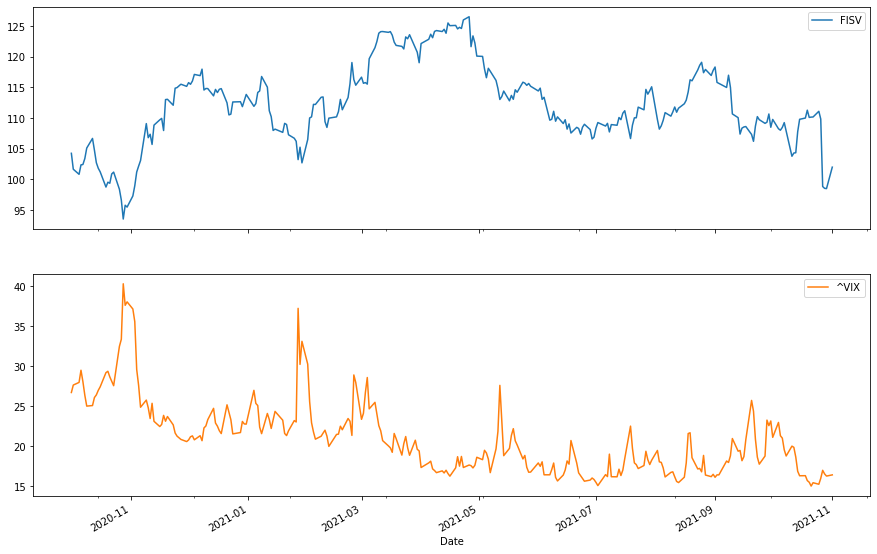

In [10]:
data_fisv_adjclose.plot(figsize=(15, 10), subplots=True)

#### Step 2-b: Summary Stats on FISV Adj Close Price

In [11]:
data_fisv_adjclose.describe().round(3)

,FISV,^VIX
count,274.000,274.000
mean,112.131,20.990
std,6.653,4.578
min,93.520,15.010
25%,108.483,17.338
50%,111.355,20.435
75%,115.770,23.110
max,126.550,40.280


#### Step 2-c: Calculate Percentage Change

In [12]:
data_fisv_adjclose.pct_change().round(4).head(14)

,FISV,^VIX
Date,,
2020-10-01,NaN,NaN
2020-10-02,-0.0249,0.0348
2020-10-05,-0.0082,0.0119
2020-10-06,0.0153,0.0544
2020-10-07,0.0006,-0.0482
2020-10-08,0.0095,-0.0606
2020-10-09,0.0166,-0.0516
2020-10-12,0.0149,0.0028
2020-10-13,-0.0180,0.0399


#### Step 2-d: Calculate Logarithmic (log) Returns

In [13]:
retrn = np.log(data_fisv_adjclose / data_fisv_adjclose.shift(1))

In [14]:
retrn.head(14).round(4)

,FISV,^VIX
Date,,
2020-10-01,NaN,NaN
2020-10-02,-0.0253,0.0342
2020-10-05,-0.0082,0.0119
2020-10-06,0.0152,0.0529
2020-10-07,0.0006,-0.0494
2020-10-08,0.0094,-0.0625
2020-10-09,0.0165,-0.0530
2020-10-12,0.0148,0.0028
2020-10-13,-0.0182,0.0391


#### Step 2-e: Plot Logarithmic (log) Returns

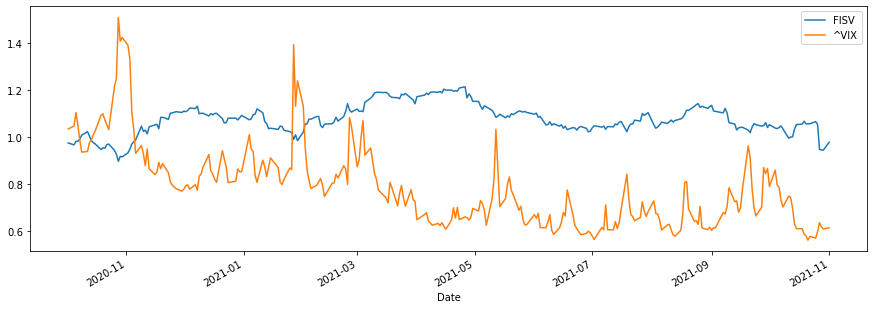

In [15]:
retrn.cumsum().apply(np.exp).plot(figsize=(15, 5));

#### Step 2-f: Rolling Statistics

In [16]:
sym = 'FISV'
fisv_data = pd.DataFrame(data_fisv_adjclose[sym]).dropna()
fisv_data.tail(14)

,FISV
Date,
2021-10-13,104.339996
2021-10-14,107.779999
2021-10-15,109.800003
2021-10-18,110.010002
2021-10-19,111.290001
2021-10-20,110.110001
2021-10-21,110.160004
2021-10-22,110.180000
2021-10-25,111.110001


In [17]:
window = 10
fisv_data['min'] = data_fisv_adjclose[sym].rolling(window=window).min()
fisv_data['mean'] = data_fisv_adjclose[sym].rolling(window=window).mean()
fisv_data['std'] = data_fisv_adjclose[sym].rolling(window=window).std()
fisv_data['median'] = data_fisv_adjclose[sym].rolling(window=window).median()
fisv_data['max'] = data_fisv_adjclose[sym].rolling(window=window).max()
fisv_data['ewma'] = data_fisv_adjclose[sym].ewm(halflife=0.5, min_periods=window).mean()
fisv_data.dropna().head()

,FISV,min,mean,std,median,max,ewma
Date,,,,,,,
2020-10-14,102.709999,100.820000,103.415,1.779184,103.049999,106.68,103.310216
2020-10-15,101.809998,100.820000,103.171,1.818819,102.564999,106.68,102.185052
2020-10-16,101.220001,100.820000,103.128,1.863312,102.564999,106.68,101.461264
2020-10-19,98.739998,98.739998,102.920,2.229659,102.564999,106.68,99.420314
2020-10-20,99.529999,98.739998,102.637,2.474763,102.564999,106.68,99.502578


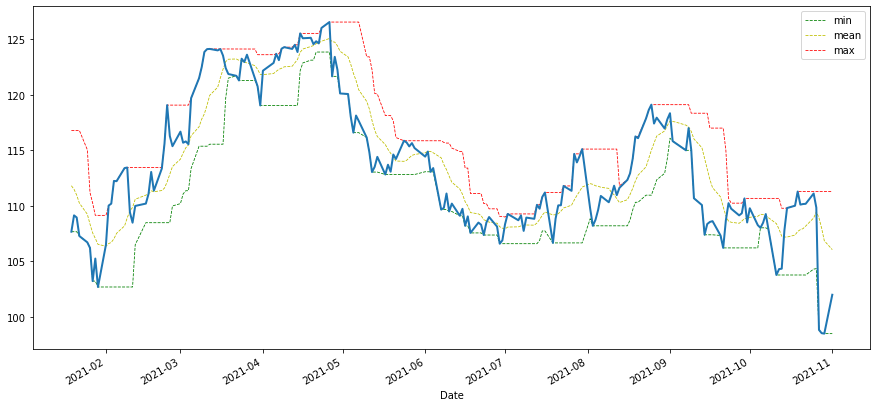

In [18]:
ax = fisv_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(15, 7), style=['g--', 'y--', 'r--'], lw=0.8)
data_fisv_adjclose[sym].iloc[-200:].plot(ax=ax, lw=2.0);

#### Step 2-g:  Simple Moving Averages (SMAs)

In [19]:
fisv_data['SMA1'] = data_fisv_adjclose[sym].rolling(window=20).mean()
fisv_data['SMA2'] = data_fisv_adjclose[sym].rolling(window=60).mean()
fisv_data[[sym, 'SMA1', 'SMA2']].tail(14)

,FISV,SMA1,SMA2
Date,,,
2021-10-13,104.339996,108.0560,111.605834
2021-10-14,107.779999,108.0175,111.568167
2021-10-15,109.800003,108.0765,111.564000
2021-10-18,110.010002,108.2105,111.534334
2021-10-19,111.290001,108.4645,111.533334
2021-10-20,110.110001,108.5355,111.457167
2021-10-21,110.160004,108.5315,111.394667
2021-10-22,110.180000,108.5535,111.323334
2021-10-25,111.110001,108.6520,111.256667


<AxesSubplot:xlabel='Date'>

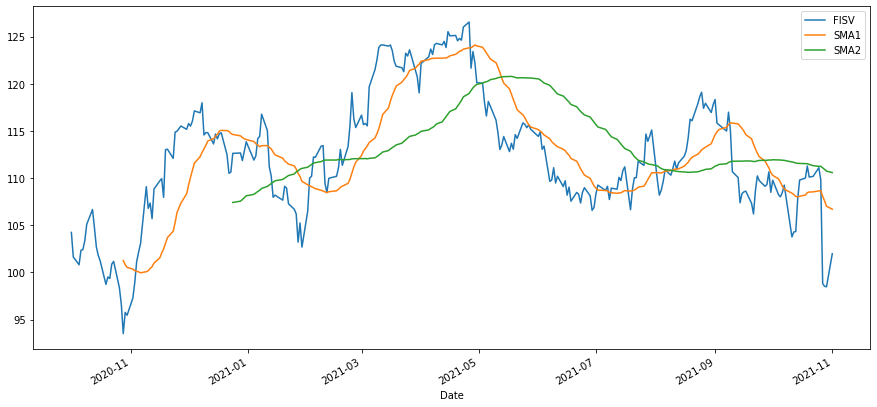

In [20]:
fisv_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(15, 7))

### Step 3: FISV Volatility

In [21]:
FISV_vol = retrn['FISV']
vol = np.sqrt(252)*FISV_vol.std()
print("Annualised volatility for FISV equals",round(vol*100,2),"%")

Annualised volatility for FISV equals 25.67 %


### Step 4: Option Pricing Methodology 1 - Binomial Tree

#### Step 4-a: Input Data

In [22]:
FISV = data_fisv_adjclose['FISV']
S0 = FISV[-1]        # spot stock price
print('FISV Spot Price equals $' + str(round(S0,2)))

FISV Spot Price equals $101.99


In [23]:
S0 = FISV[-1]        # spot price
K = 110.00           # strike price
T = 1.0              # maturity time
r = 0.0136           # risk free rate 
sig = 0.2567         # diffusion coefficient or annualised volatility
N = 5                # number of periods or number of time steps  
payoff = "Call"      # payoff

#### Step 4-b: Create Binomial Price Tree

In [24]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u  

In [25]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
S

array([[101.98999786, 114.39695692, 128.31320745, 143.92235291,
        161.4303319 , 181.06813523],
       [  0.        ,  90.92863957, 101.98999786, 114.39695692,
        128.31320745, 143.92235291],
       [  0.        ,   0.        ,  81.06694448,  90.92863957,
        101.98999786, 114.39695692],
       [  0.        ,   0.        ,   0.        ,  72.27480273,
         81.06694448,  90.92863957],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         64.43621556,  72.27480273],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  57.44776491]])

In [26]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.483168372902796

#### Step 4-c: Find option value at each final node

In [27]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
V[:,-1] = np.maximum(S_T-K, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        71.06813523],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        33.92235291],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         4.39695692],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

#### Step 4-d: Find American option value at earlier nodes

In [28]:
for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 7.86596385, 13.28325999, 21.8186254 , 34.5191282 , 51.72912536,
        71.06813523],
       [ 0.        ,  2.8429709 ,  5.37383891, 10.06033989, 18.61200091,
        33.92235291],
       [ 0.        ,  0.        ,  0.49193063,  1.02090809,  2.11869981,
         4.39695692],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [29]:
print('American ' +'\033[1m'+ payoff +'\033[0m'
      + ' Option Price based on '
      +'\033[1m'+'Binomial Tree '+'\033[0m' +'Equals $' + str(round(V[0,0],2))) 

American Call Option Price based on Binomial Tree Equals $7.87


### Step 5: Option Pricing Methodology 2 - Monte Carlo Simulation

In [30]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [31]:
T = 1.0
r = 0.0136
sigma = 0.2567
S0 = FISV[-1]
K = 110

In [32]:
S = mcs_simulation_np(1000)

In [33]:
S = np.transpose(S)
S

array([[101.98999786, 101.65257367, 100.76698863, ...,  98.03777657,
         98.69351698,  99.49973962],
       [101.98999786, 102.12549747, 101.45516033, ...,  62.33771262,
         62.1021253 ,  61.89305898],
       [101.98999786, 102.52722508, 104.48897296, ...,  81.58442566,
         81.64133031,  80.69082874],
       ...,
       [101.98999786, 103.27588523, 102.82054712, ...,  89.27140664,
         88.47241748,  87.84709674],
       [101.98999786, 102.28262667, 102.02708173, ..., 116.88393565,
        117.9006417 , 118.94738395],
       [101.98999786, 101.80489009, 102.99469079, ..., 162.23209895,
        160.44649005, 161.8368626 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

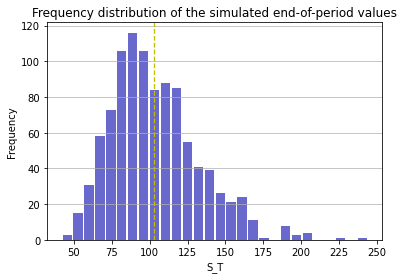

In [34]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.6, rwidth=0.85)

plt.grid(axis='y', alpha=0.9)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.axvline(S.mean(), color='y', linestyle='dashed', linewidth=1.3)
plt.title('Frequency distribution of the simulated end-of-period values')

In [35]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('American ' +'\033[1m'+ payoff +'\033[0m' 
      +' Option Price based on '
      +'\033[1m'+ 'Monte Carlo Simulation '+'\033[0m'
      +'Equals $' 
      +'\033[1m'+ str(round(c,2))+'\033[0m')

American Call Option Price based on Monte Carlo Simulation Equals $8.92


### Step 6: Greeks Analysis

### Step 6-a: Delta

In [36]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [37]:
delta(101.99, 110, 1, 0.0136, 0, 0.2567, 'call')

0.4549364432876727

In [38]:
S = np.linspace(50,200,20)
Delta_Call = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 110, 1, 0.0136, 0, 0.2567, 'call')

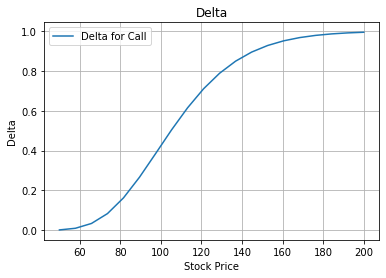

In [39]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

### Step 6-b: Gamma

In [40]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [41]:
gamma(101.99, 110, 1, 0.0136, 0, 0.2567, 'call')

0.015140634785364076

In [42]:
S = np.linspace(50,200,20)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 110, 1, 0.0136, 0, 0.2567, 'call')

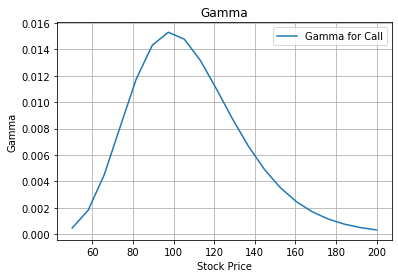

In [43]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

### Step 6-c: Speed

In [44]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [45]:
speed(101.99, 110, 1, 0.0136, 0, 0.2567, 'call')

-8.298811982749997e-05

In [46]:
S = np.linspace(50,150,15)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')

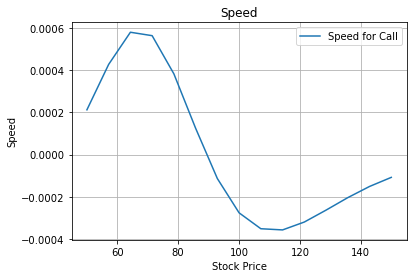

In [47]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call'])

### Step 6-d: Theta

In [48]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    return theta

In [49]:
theta(101.99, 110, 1, 0.0136, 0, 0.2567, 'call')

5.7139501357207685

In [50]:
T = np.linspace(0.25,3,15)
Theta_Call = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(101.99, 110, T[i], 0.0136, 0, 0.2567, 'call')

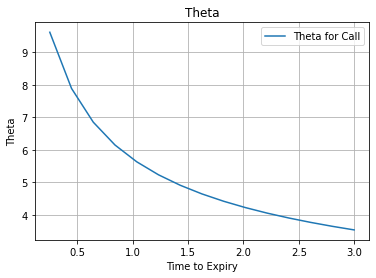

In [51]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

### Step 6-e: Rho

In [52]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    return rho

In [53]:
rho(101.99, 110, 1, 0.0136, 0, 0.2567, 'call')

38.601613079467995

In [54]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(101.99, 110, 1, r[i], 0, 0.2567, 'call')

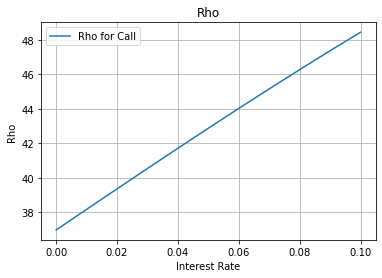

In [55]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

## EOF